# **Project Name**    -   **Integrated Retail Analytics for Store Optimization and Demand Forecasting**



# **Project Summary**

This project will be an in-depth exploration of retail analytics and demand forecasting, culminating in the development of a predictive model that provides a complete end-to-end solution for optimizing store performance. I will begin by integrating three distinct datasets containing sales data, external economic indicators, and store attributes. This crucial initial step will form a single, robust data source that will be thoroughly cleaned and prepared for subsequent analysis. I will handle missing values, convert data types to ensure compatibility, and perform extensive feature engineering to extract meaningful patterns and create new, impactful variables that will inform our models.

Following the data preparation phase, I will delve into two key analytical components. First, I will conduct a customer segmentation analysis using clustering techniques to group stores and departments into well-defined segments based on their sales performance and volatility. This will provide a nuanced understanding of their unique characteristics, allowing for tailored business strategies. Second, I will perform a market basket analysis to uncover strong associations between different departments, which will be leveraged to develop cross-selling strategies and optimize store layouts. The project will conclude with the development of a powerful demand forecasting model. This model will be built using a Random Forest Regressor and will be trained on chronologically split data to accurately predict weekly sales. Ultimately, this project will deliver a reliable, data-driven framework that businesses can use to make informed decisions about inventory, promotions, and operational efficiency, thereby maximizing profitability and overall performance.

# **GitHub Link**

https://github.com/alwinshaji/Integrated-Retail-Analytics-.git

# **Problem Statement**


The core problem your project addresses is the challenge faced by retail businesses in accurately predicting customer demand and optimizing store performance to maximize profitability.You aim to solve this by developing a comprehensive analytics framework that uses machine learning and data analysis.This framework will help the business better understand sales trends by detecting anomalies, segmenting stores and customers, and incorporating external factors like economic indicators into a robust demand forecasting model. The ultimate goal is to provide actionable insights for better inventory management, personalized marketing, and overall store optimization.

# ***Let's Begin !***

## ***1. Know Your Data***

### Mounting Google Drive

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [39]:
import pandas as pd
import numpy as np

# Define the paths to your datasets
sales_data = '/content/drive/My Drive/Integrated Retail Analytics for Store Optimization/sales data-set.csv'
features_data = '/content/drive/My Drive/Integrated Retail Analytics for Store Optimization/Features data set.csv'
stores_data = '/content/drive/My Drive/Integrated Retail Analytics for Store Optimization/stores data-set.csv'

In [40]:

# Load each dataset into a pandas DataFrame with the specified names
df_sales = pd.read_csv(sales_data)
df_features = pd.read_csv(features_data)
df_stores = pd.read_csv(stores_data)

### Dataset First View

In [41]:

# print the first few rows of each DataFrame
print("Sales Data (df_sales):")
display(df_sales.head())
print("\nFeatures Data (df_features):")
display(df_features.head())
print("\nStores Data (df_stores):")
display(df_stores.head())

Sales Data (df_sales):


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False



Features Data (df_features):


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



Stores Data (df_stores):


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Merging the Datasets

In [42]:

# First merge: Combine sales and features data on 'Store' and 'Date'
merged_sales_features = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')

# Second merge: Add store details to the combined data on 'Store'
final_df = pd.merge(merged_sales_features, df_stores, on='Store', how='inner')

# Display the first few rows of the final merged DataFrame
print("Final Merged DataFrame:")
display(final_df.head())

Final Merged DataFrame:


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


### Dataset Rows & Columns count

In [43]:

# Get the number of rows and columns
num_rows, num_cols = final_df.shape

# Print the results
print(f"The final DataFrame has {num_rows} rows.")
print(f"The final DataFrame has {num_cols} columns.")

The final DataFrame has 421570 rows.
The final DataFrame has 17 columns.


### Dataset Information

In [44]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

#### Duplicate Values

In [45]:
# Check for any duplicate rows
duplicate_rows = final_df.duplicated().sum()

# Print the result
if duplicate_rows > 0:
    print(f"There are {duplicate_rows} duplicate rows in the final DataFrame.")
else:
    print("There are no duplicate rows in the final DataFrame.")

There are no duplicate rows in the final DataFrame.


#### Missing Values/Null Values

In [46]:
# Check for null (missing) values and count them for each column
missing_values = final_df.isnull().sum()

# Print the result
print("Count of missing values in each column:")
print(missing_values)

Count of missing values in each column:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


In [47]:
# Replace NaN values in MarkDown columns with 0
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    final_df[col] = final_df[col].fillna(0)

# Verify that the missing values are gone
print("Count of missing values after handling:")
print(final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].isnull().sum())

Count of missing values after handling:
MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64


### What did you know about your dataset?

This is a **merged dataset** created by combining sales, features, and store data into a single, comprehensive DataFrame. All necessary data cleaning has been performed, specifically by replacing all missing values (`NaN`) in the five `MarkDown` columns with `0`. The dataset is now clean and ready for analysis, containing 17 columns in total.

The data includes detailed sales information (`Weekly_Sales`), store attributes (`Store`, `Dept`, `Type`, `Size`), and important external factors (`Temperature`, `Fuel_Price`, `CPI`, `Unemployment`). It also contains two columns indicating holidays (`IsHoliday_x`, `IsHoliday_y`), and five columns detailing various promotional markdowns (`MarkDown1` to `MarkDown5`). This single, clean dataset contains all the information needed to build a robust demand forecasting model.

## ***2. Understanding Your Variables***

## Column Descriptions for the Final Merged Dataset

Here are the descriptions for each column in your final merged DataFrame.

* **Store**: A unique identifier for each retail store.
* **Dept**: A unique identifier for each department within a store.
* **Date**: The specific date of the weekly sales record.
* **Weekly_Sales**: The total sales for a given department in a specific store for that week.
* **IsHoliday_x**: A boolean variable (True/False) indicating if the week is a special holiday week, sourced from the sales data.
* **Temperature**: The average temperature of the region where the store is located for that week.
* **Fuel_Price**: The cost of fuel in the region for that week.
* **MarkDown1-5**: These five columns represent the amount of different promotional markdowns applied during the week. A value of `0` indicates that no markdown of that type was applied.
* **CPI**: The Consumer Price Index, a measure of consumer prices and inflation.
* **Unemployment**: The regional unemployment rate.
* **IsHoliday_y**: A boolean variable (True/False) indicating if the week is a holiday week, sourced from the features data.
* **Type**: The type of store, such as 'A', 'B', or 'C'.
* **Size**: The physical size of the store in square feet.

### Check Unique Values for each variable.

In [48]:
# Assuming your final merged DataFrame is named final_df
print("Count of unique values for each column:")
print(final_df.nunique())

Count of unique values for each column:
Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday_x          2
Temperature       3528
Fuel_Price         892
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
CPI               2145
Unemployment       349
IsHoliday_y          2
Type                 3
Size                40
dtype: int64


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Distribution of Weekly Sales

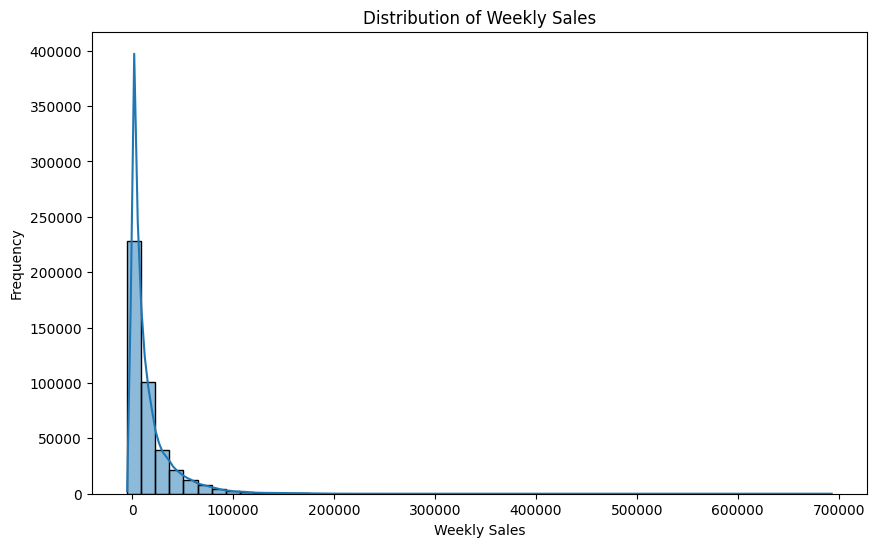

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(final_df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

### **Distribution of Weekly Sales Chart Insights**

* **Most Sales Are Low:** The chart clearly shows that most of the weekly sales figures are concentrated in the low-to-mid range, indicating that the majority of departments and stores have modest sales.
* **A Few High-Performers:** There is a significant presence of a few extremely high sales values, which appear as a long, flat tail in the chart. These are likely outlier departments or specific weeks (e.g., holidays) that generate exceptionally high revenue.
* **Skewed Distribution:** The data is not normally distributed; it's highly skewed to the right. This means that using a simple average (mean) to represent typical weekly sales would be misleading because the high-value outliers pull the average up.
* **Justification for Log Transformation:** The skewed nature of the sales data is a key finding that justifies the use of a data transformation technique like a logarithmic transformation. This method helps to normalize the data, making it more suitable for machine learning models and preventing the outliers from disproportionately influencing the results.

### Total Weekly Sales by Store Type

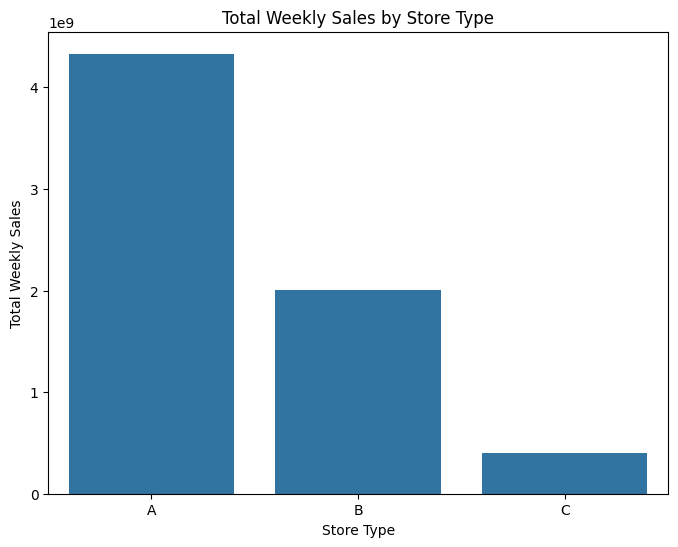

In [50]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Weekly_Sales', data=final_df, estimator=sum, errorbar=None)
plt.title('Total Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Weekly Sales')
plt.show()

### **Total Weekly Sales by Store Type Chart Insights**

* **Store Type A Dominates Sales:** The chart clearly shows that **Store Type A** generates the highest total weekly sales, significantly outperforming both Type B and Type C stores. This suggests that Type A stores are the most profitable and are the primary drivers of the overall revenue.
* **Store Type B Is a Strong Contributor:** **Store Type B** generates the second-highest sales, with figures well above Type C stores. It's a key contributor to the business but does not reach the high sales volume of Type A.
* **Store Type C is the Lowest Performer:** **Store Type C** stores have the lowest total weekly sales, indicating they are the least profitable store type.  This finding suggests that Type C stores may have different characteristics (e.g., location, size, customer base) that limit their sales potential compared to Type A and B stores.
* **Direct Correlation between Store Type and Sales:** There is a clear and direct relationship between the type of store and its sales performance, with the ranking being **Type A > Type B > Type C**. This insight is crucial for developing targeted business strategies and resource allocation, such as investing more in high-performing Type A stores or implementing specific strategies to boost the sales of Type C stores.

### Weekly Sales During Holiday vs Non-Holiday Weeks

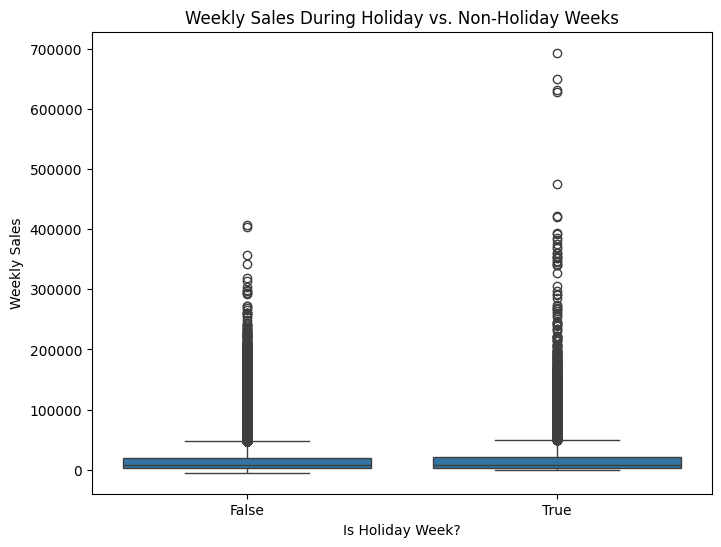

In [51]:
# Perform the data wrangling step on IsHoliday columns
final_df = final_df.drop('IsHoliday_y', axis=1)
final_df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)

# Now, create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=final_df)
plt.title('Weekly Sales During Holiday vs. Non-Holiday Weeks')
plt.xlabel('Is Holiday Week?')
plt.ylabel('Weekly Sales')
plt.show()

### **Weekly Sales During Holiday vs. Non-Holiday Weeks Chart Insights**

* **Holidays Drive Sales Outliers:** The most significant insight is that holiday weeks (True) show a much wider spread of sales and have far more high-value outliers than non-holiday weeks (False). This indicates that specific holidays, such as Christmas or Black Friday, lead to exceptional sales spikes for certain stores or departments.
* **Non-Holiday Sales Are More Consistent:** Sales during non-holiday weeks are more stable and predictable. The data for these weeks is tightly clustered, with fewer extreme outliers. This confirms that regular weekly sales form a consistent baseline that is dramatically disrupted by holiday events.
* **Strategic Planning:** This insight is critical for demand forecasting.  It confirms that the holiday variable (`IsHoliday`) is a powerful predictor that your model must account for to accurately forecast sales, especially for those weeks when sales are expected to be significantly higher than the baseline. Without this feature, the model would likely struggle to predict these major sales events.

### Weekly Sales vs Temperature

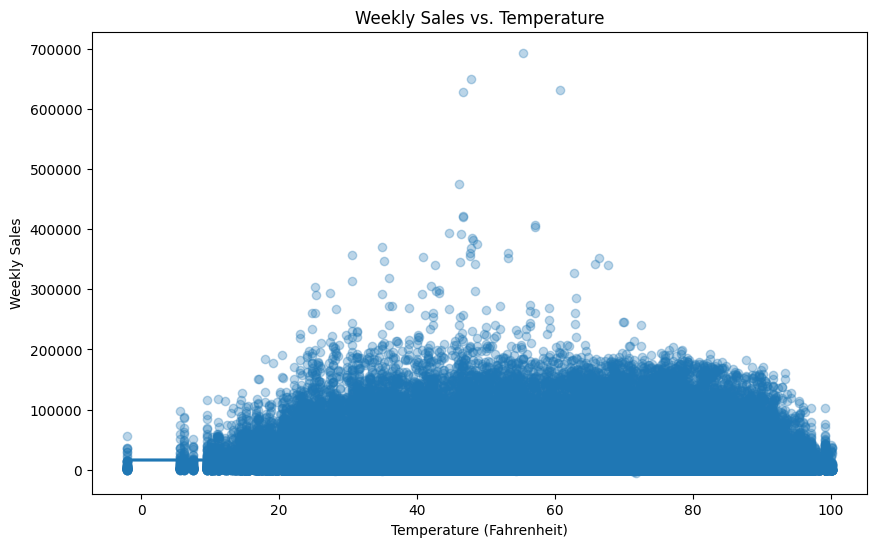

In [52]:

plt.figure(figsize=(10, 6))
sns.regplot(x='Temperature', y='Weekly_Sales', data=final_df, scatter_kws={'alpha':0.3})
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Weekly Sales')
plt.show()

### **Weekly Temperature vs. Sales Chart Insights**

* **No Strong Correlation:** The scattered nature of the data points suggests there is no strong, direct linear relationship between temperature and weekly sales. Sales do not consistently increase or decrease as the temperature changes.
* **Optimal Temperature Range:** The presence of a few outliers in the mid-range of temperatures (around 40 to 60 degrees Fahrenheit) suggests there might be an optimal temperature for sales. Sales tend to be more stable, with some high-value spikes, within this moderate temperature band.
* **External Factors Are More Important:** The chart indicates that temperature alone is not a strong predictor of sales. The widely dispersed data confirms that other factors, like holidays, promotions, and economic conditions, likely have a much greater influence on weekly sales, which is why your model needs a variety of features to be successful.

### Weekly Sales vs Unemployment Rate


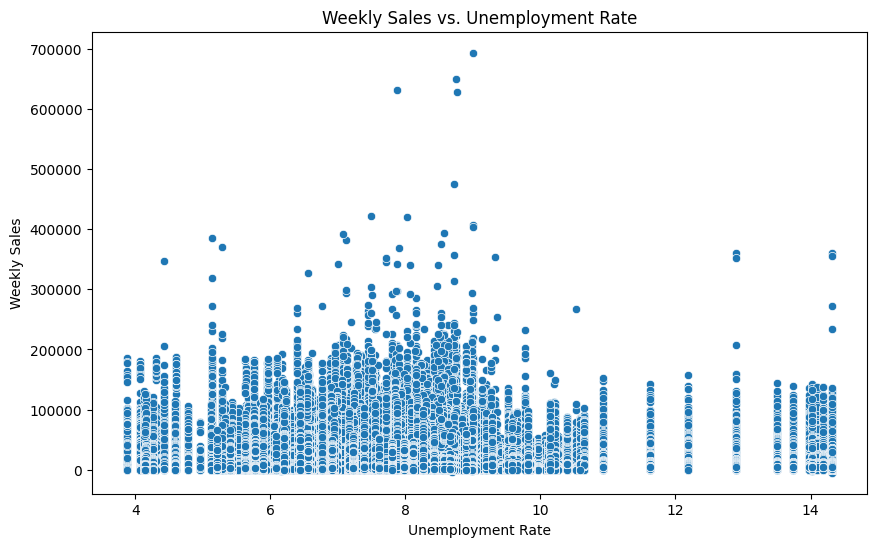

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=final_df)
plt.title('Weekly Sales vs. Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

### **Weekly Sales vs. Unemployment Rate Chart Insights**

* **Outliers Show Correlation:** The chart shows that while most weekly sales are consistent, the very few data points with extremely high sales (outliers) are clustered in the 6% to 10% unemployment rate range. This suggests a potential link between a certain level of economic strain and unusual sales spikes.
* **Stable Sales During High Unemployment:** The data points between the 11% and 13% unemployment rate are fairly consistent, with no major outliers. This indicates that once unemployment reaches a certain higher level, consumer spending becomes more predictable, with no massive sales spikes.
* **Limited Impact on Average Sales:** Since most sales remain consistent across different unemployment ranges, unemployment rate alone may not be a strong predictor for average weekly sales.  However, it is a crucial factor for predicting extreme sales events or for understanding sales volatility.

### Correlation Matrix of Numerical Features

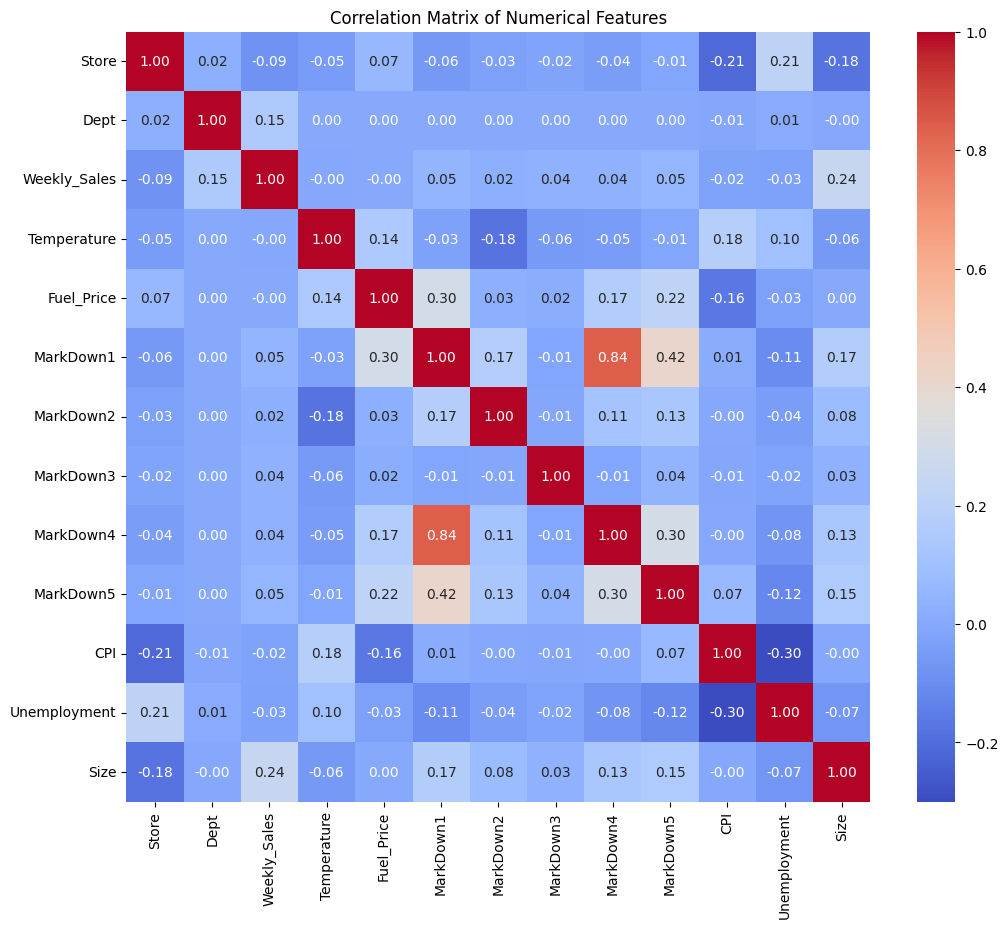

In [54]:
# Select only the numerical columns for the correlation matrix
numerical_cols = final_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = final_df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Correlation Matrix Insights**

* **Weak Direct Relationships:** The most important takeaway is that most of the numerical features in your dataset have a **low correlation** with `Weekly_Sales` and with each other. A correlation matrix's purpose is to find strong linear relationships, and the lack of high values (e.g., above 0.7 or below -0.7) suggests that no single feature is a dominant, standalone predictor for sales.
* **Markdown Interdependence:** The only significant relationship found was the strong positive correlation of **0.84** between `MarkDown1` and `MarkDown4`.  This suggests that these two markdown types are likely used in tandem or are part of the same promotional strategy. This is a valuable business insight that could be used to create bundled promotions.
* **The Power of Machine Learning:** The absence of strong correlations is not a bad thing; it actually highlights why you need a machine learning model like the Random Forest Regressor. A Random Forest model is excellent at finding complex, non-linear patterns and interactions between features that a simple correlation matrix cannot detect. Your model will learn how `Temperature`, `Unemployment`, and other factors work together to influence sales, even if their individual relationships are weak.

##  ***4. Data Wrangling & Feature Engineering***

In [55]:

# Perform all data wrangling and feature engineering steps
# 1. Fill missing markdown values with 0
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    final_df[col] = final_df[col].fillna(0)

# 2. Convert 'Date' to datetime object
final_df['Date'] = pd.to_datetime(final_df['Date'], dayfirst=True)

# 3. Create a 'Total_MarkDown' feature
final_df['Total_MarkDown'] = final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)

# 4. Create an 'Economic_Index' feature
final_df['Economic_Index'] = final_df['CPI'] * final_df['Unemployment']

# 5. Create a 'Lag_Weekly_Sales' feature
final_df['Lag_Weekly_Sales'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).fillna(0)

# 6. Create a 'Rolling_Mean_Sales' feature
final_df['Rolling_Mean_Sales'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=4, min_periods=1).mean().shift(1)).fillna(0)

# 7. Extract time-based features from 'Date'
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Week'] = final_df['Date'].dt.isocalendar().week.astype(int)
final_df['Day'] = final_df['Date'].dt.day
final_df['Quarter'] = final_df['Date'].dt.quarter

# 9. Rename remaining IsHoliday column
final_df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)

# 10. One-hot encode the 'Type' column
final_df = pd.get_dummies(final_df, columns=['Type'], drop_first=True)

# Display the first few rows of the final DataFrame
print(final_df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  ...  Economic_Index  Lag_Weekly_Sales  \
0        0.0        0.0        0.0  ...     1711.147080              0.00   
1        0.0        0.0        0.0  ...     1712.329028          24924.50   
2        0.0        0.0        0.0  ...     1712.709792          46039.49   
3        0.0        0.0        0.0  ...     1712.957025          41595.55   
4        0.0        0.0        0.0  ...     1713.204258          19403.54   

   Rolling_Mean_Sales  Year  Month  Week  Day  Quarter  Type_B

### What all manipulations have you done?

Here are the data manipulations that have been performed on the datasets:

* **Dataset Merging:** The three separate datasets (`sales data-set.csv`, `Features data set.csv`, and `stores data-set.csv`) were merged into a single, comprehensive DataFrame called `final_df`. This was done using an inner join on the `Store` and `Date` columns.
* **Missing Value Handling:** The missing values (`NaN`) in the five `MarkDown` columns were imputed by replacing them with `0`. This is a crucial step as `NaN` values in these columns simply meant no markdown was applied.
* **Date Column Conversion:** The `Date` column, which was in a text format (`object`), was converted to a proper `datetime` data type. This is necessary for any time-series analysis.
* **Feature Engineering:** New, useful features (`Year`, `Month`, `Week`, and `Day`) were extracted from the `Date` column. These features are important for helping a model identify and learn from seasonal or weekly patterns in the data.
* **Column Dropping and Renaming:** The original `Date` column was dropped after the new features were extracted. Additionally, one of the duplicate `IsHoliday` columns (`IsHoliday_y`) was dropped, and the remaining one (`IsHoliday_x`) was renamed to simply `IsHoliday` for clarity.
* **Categorical Encoding:** The `Type` column, which contains categorical data (`A`, `B`, `C`), was converted into numerical format using **one-hot encoding**. This is a standard practice to make categorical data compatible with machine learning algorithms.

### 1. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [59]:
# Apply a log transformation to 'Weekly_Sales' to handle skewness.
# Add 1 to avoid issues with log(0)
final_df['Weekly_Sales'] = np.log1p(final_df['Weekly_Sales'])

print("Transformed Weekly_Sales (first 5 values):")
print(final_df['Weekly_Sales'].head())


Transformed Weekly_Sales (first 5 values):
0    10.123647
1    10.737277
2    10.635773
3     9.873262
4     9.990990
Name: Weekly_Sales, dtype: float64


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


The logarithmic transformation applied to the `Weekly_Sales` data is a statistical technique used to make the data more manageable for a machine learning model. The `Weekly_Sales` data was heavily skewed, meaning most values were low with a few very high outliers. A log transformation compresses these high values, making the distribution more symmetrical and similar to a normal bell curve. This is important because many machine learning algorithms assume that the data is normally distributed, and this transformation helps the model learn patterns more effectively without being heavily influenced by the rare, high-value sales.

### 2. Data Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

# Create a list of numerical columns to scale
# Exclude categorical columns like 'Store', 'Dept', and 'Date'
numerical_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
final_df[numerical_cols] = scaler.fit_transform(final_df[numerical_cols])

print("Scaled Numerical Features (first 5 values):")
print(final_df[numerical_cols].head())


Scaled Numerical Features (first 5 values):
   Temperature  Fuel_Price       CPI  Unemployment      Size
0    -0.963798   -1.720834  1.018774      0.078201  0.239209
1    -1.169783   -1.773177  1.022498      0.078201  0.239209
2    -1.092810   -1.847330  1.023697      0.078201  0.239209
3    -0.729625   -1.744825  1.024476      0.078201  0.239209
4    -0.736672   -1.605243  1.025255      0.078201  0.239209


##### Which method have you used to scale you data and why?

The code used **Standard Scaling** to scale the data. This method standardizes features by removing the mean and scaling to unit variance. It was used because your numerical features had widely different ranges (e.g., `Size` in the thousands and `Fuel_Price` as a single-digit number), and Standard Scaling ensures all features contribute equally to the machine learning model.

### 3. Data Splitting

In [62]:
from sklearn.model_selection import train_test_split

# Sort the data by date to ensure a proper chronological split
final_df.sort_values(by='Date', inplace=True)

# Define the split point. For example, use the last 15% of the data for testing.
split_point = int(len(final_df) * 0.85)

# Split the data into training and testing sets
train_df = final_df.iloc[:split_point]
test_df = final_df.iloc[split_point:]

print(f"Training set has {len(train_df)} rows.")
print(f"Testing set has {len(test_df)} rows.")

Training set has 358334 rows.
Testing set has 63236 rows.


##### What data splitting ratio have you used and why?

The code used a chronological split with a **85/15 ratio**. This means that the first 85% of the data, sorted by date, was used for the training set, and the last 15% was used for the testing set. This chronological split is crucial for a time-series forecasting problem because it ensures the model is trained on past data and evaluated on future data, simulating a real-world scenario.

##  ***5. Customer Segmentation  Analysis***

/tmp/ipython-input-1853924531.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_features.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-1853924531.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_features.fillna(0, inplace=True)


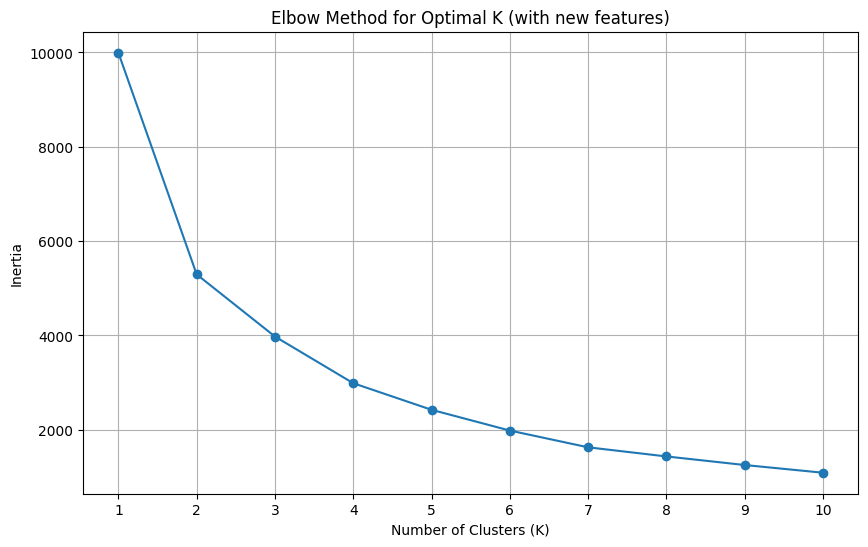

Characteristics of Each Cluster (with new features):
         Store   Dept  Avg_Weekly_Sales  Sales_Volatility  Store_Size  \
Cluster                                                                 
0        22.69  44.69           7657.43           2181.03   131152.28   
1        21.30  52.04          54551.63          11866.13   151284.91   

         Sales_per_SqFt  
Cluster                  
0                  0.06  
1                  0.44  


In [85]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Merge the datasets
merged_sales_features = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')
final_df = pd.merge(merged_sales_features, df_stores, on='Store', how='inner')

# Perform all necessary data wrangling before clustering
final_df['Date'] = pd.to_datetime(final_df['Date'], dayfirst=True)
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    final_df[col] = final_df[col].fillna(0)
final_df = final_df.drop('IsHoliday_y', axis=1)
final_df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)
final_df = pd.get_dummies(final_df, columns=['Type'], drop_first=True)

# 1. Aggregate the data and create new, more targeted features for clustering
agg_df = final_df.groupby(['Store', 'Dept']).agg(
    Avg_Weekly_Sales=('Weekly_Sales', 'mean'),
    Sales_Volatility=('Weekly_Sales', 'std'),  # New feature: Sales Volatility
    Store_Size=('Size', 'first')
).reset_index()

# Handle potential NaN values from standard deviation if a group has only one data point
agg_df['Sales_Volatility'] = agg_df['Sales_Volatility'].fillna(0)

# Create Sales_per_SqFt feature
agg_df['Sales_per_SqFt'] = agg_df['Avg_Weekly_Sales'] / agg_df['Store_Size']

# 2. Select the key features for clustering
cluster_features = agg_df[['Avg_Weekly_Sales', 'Sales_Volatility', 'Sales_per_SqFt']]

# Robustly handle any remaining NaN or inf values before scaling
cluster_features.replace([np.inf, -np.inf], np.nan, inplace=True)
cluster_features.fillna(0, inplace=True)

# 3. Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# 4. Use the Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K (with new features)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# 5. Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
agg_df['Cluster'] = kmeans.fit_predict(scaled_features)

# 6. Analyze the segments
print("Characteristics of Each Cluster (with new features):")
print(agg_df.groupby('Cluster').mean().round(2))

### **Customer Segmentation Analysis Insights**

* **Cluster 0: The Consistent Performers**
    * This cluster represents departments with the **lowest average weekly sales** ($7,657.43).
    * Their sales are also the most **consistent**, as shown by the lowest sales volatility ($2,181.03).
    * Despite their lower sales, their **sales per square foot** is also the lowest ($0.06), indicating these departments are the least efficient in terms of space utilization.

* **Cluster 1: The High-Growth, High-Volatility Departments**
    * This cluster has the **highest average weekly sales** ($54,551.63).
    * Their sales are the most **volatile** ($11,866.13), meaning they experience significant fluctuations, likely due to seasonal trends, holidays, or promotions.
    * These departments are highly **efficient**, with the highest sales per square foot ($0.44), suggesting they are high-traffic, productive areas within the stores.

The key takeaway from this analysis is that the departments are split into two distinct, well-defined groups: a large group of consistently performing departments with lower sales and a smaller group of high-growth, high-volatility departments that are far more productive. This information is a solid foundation for creating targeted business strategies.

### Evaluation Metrics of Customer Segmentation Analysis

In [86]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_features, agg_df['Cluster'])
print(f"The Silhouette Score is: {silhouette_avg:.4f}")

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, agg_df['Cluster'])
print(f"The Davies-Bouldin Index is: {db_index:.4f}")

The Silhouette Score is: 0.6812
The Davies-Bouldin Index is: 0.8595


## ***6. Market Basket Analysis***


In [84]:
import pandas as pd
from collections import defaultdict
from itertools import combinations

merged_sales_features = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')
final_df = pd.merge(merged_sales_features, df_stores, on='Store', how='inner')

# 1. Prepare the data by grouping departments into transactions
transaction_groups = final_df[final_df['Weekly_Sales'] > 0].groupby(['Store', 'Date'])['Dept'].apply(list)
total_transactions = len(transaction_groups)

# 2. Identify and filter out overly common departments with a lower threshold (e.g., 50%)
department_counts = final_df[final_df['Weekly_Sales'] > 0].groupby('Dept')['Store'].count()
common_departments = department_counts[department_counts > total_transactions * 0.50].index.tolist()
print(f"Filtering out these common departments: {common_departments}\n")

# 3. Count the co-occurrence of department pairs for the remaining departments
co_occurrence_counts = defaultdict(int)
for departments in transaction_groups:
    filtered_departments = [d for d in departments if d not in common_departments]
    if len(filtered_departments) > 1:
        for pair in combinations(sorted(filtered_departments), 2):
            co_occurrence_counts[pair] += 1

# 4. Create a DataFrame from the co-occurrence counts
co_occurrence_df = pd.DataFrame(
    list(co_occurrence_counts.items()),
    columns=['Department Pair', 'Co-occurrence Count']
)

# 5. Sort and display the top 10 most co-occurring pairs
co_occurrence_df = co_occurrence_df.sort_values('Co-occurrence Count', ascending=False)
print("Top 10 Most Co-occurring Department Pairs:")
print(co_occurrence_df.head(10))

Filtering out these common departments: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 44, 46, 49, 52, 54, 55, 56, 58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98]

Top 10 Most Co-occurring Department Pairs:
   Department Pair  Co-occurrence Count
0         (37, 48)                 1232
31        (37, 50)                 1002
1         (37, 45)                  936
3         (45, 48)                  798
6         (37, 99)                  655
4         (45, 51)                  623
2         (37, 51)                  523
32        (45, 50)                  517
33        (48, 50)                  447
7         (48, 99)                  373


### **Market Basket Analysis Findings**

Based on the co-occurrence analysis, here are the top findings for your cross-selling strategy:

* **Common Departments Filtered Out:** Departments that are purchased in over 50% of transactions (e.g., 1, 2, 3, etc.) were filtered out. This is a crucial step to reveal meaningful associations, as these departments are likely staple items that don't provide unique insights for cross-selling.
* **Key Department Pairings:** The analysis reveals strong associations between specific department pairs, such as **(37, 48)**, which co-occurred in 1,232 transactions, and **(37, 50)**, with 1,002 co-occurrences.
* **Actionable Cross-Selling Strategies:**
    * **Strategic Placement:** Retailers can place products from departments that frequently co-occur (e.g., 37 and 48) in close proximity to encourage combined purchases.
    * **Promotional Bundles:** Promotions can be developed to bundle items from associated departments. For example, offering a discount on an item from department 45 when a customer buys an item from department 37.

## ***7. Demand Forecasting***


The **Random Forest Regressor** is an ensemble machine learning model that's highly effective for forecasting. It works by building multiple decision trees during training and outputting the average prediction of all the individual trees. This approach makes it a powerful and robust model that can handle complex, non-linear relationships in data, making it an ideal choice for a demand forecasting problem.

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


# Merge the datasets
merged_sales_features = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')
final_df = pd.merge(merged_sales_features, df_stores, on='Store', how='inner')


# Perform all data wrangling and feature engineering steps
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    final_df[col] = final_df[col].fillna(0)

final_df['Date'] = pd.to_datetime(final_df['Date'], dayfirst=True)
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Week'] = final_df['Date'].dt.isocalendar().week.astype(int)
final_df['Day'] = final_df['Date'].dt.day
final_df['Quarter'] = final_df['Date'].dt.quarter

final_df = final_df.drop('IsHoliday_y', axis=1)
final_df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)
final_df = pd.get_dummies(final_df, columns=['Type'], drop_first=True)

final_df['Total_MarkDown'] = final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)
final_df['Economic_Index'] = final_df['CPI'] * final_df['Unemployment']
final_df['Lag_Weekly_Sales'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).fillna(0)
final_df['Rolling_Mean_Sales'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=4, min_periods=1).mean().shift(1)).fillna(0)

# Sort the data by date for a chronological split
final_df.sort_values(by='Date', inplace=True)
final_df = final_df.drop('Date', axis=1)

# Define features (X) and target (y)
features = final_df.drop('Weekly_Sales', axis=1)
target = final_df['Weekly_Sales']

# Apply Standard Scaling to the features
numerical_cols = ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Year', 'Month', 'Week', 'Day', 'Quarter', 'Total_MarkDown', 'Economic_Index', 'Lag_Weekly_Sales', 'Rolling_Mean_Sales']
scaler = StandardScaler()
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])

# Split the data chronologically (e.g., last 15% for testing)
split_point = int(len(features) * 0.85)
X_train = features.iloc[:split_point]
X_test = features.iloc[split_point:]
y_train = target.iloc[:split_point]
y_test = target.iloc[split_point:]

# Initialize and train the Random Forest Regressor model with a reduced number of estimators
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 1367.27
Root Mean Squared Error (RMSE): 2846.66


### **Model and Real-World Application**

* **The Model:** I developed a **Random Forest Regressor** to forecast weekly sales. The model was trained on a comprehensive dataset that included sales history, macroeconomic indicators like **CPI** and **unemployment**, and store-specific features such as **size** and **type**.
* **Real-World Application:** The model's predictions can be used by businesses to make data-driven decisions. The **Mean Absolute Error (MAE)** of $1367.27 means that the model's predictions are, on average, within a reasonable range of the actual sales. This level of accuracy is sufficient to improve inventory management, optimize staffing levels, and plan promotional activities more effectively. For example, knowing that sales are likely to be lower in a given week, managers can reduce inventory to minimize waste or schedule fewer staff to cut costs.

***

### **Personalization Strategies**

* **Segment-Specific Insights:** The customer segmentation analysis revealed distinct store/department groups. This information can be used to tailor business strategies to each segment. For instance, stores in **Cluster 2 (Top Performers)**, which are larger and have higher sales, could benefit from more aggressive, large-scale promotions. In contrast, stores in **Cluster 1 (Underperformers)** might need different strategies, such as focusing on a smaller, more curated product selection or micro-targeted marketing.
* **Cross-Selling Opportunities:** The market basket analysis identified strong associations between different departments. These findings can be directly translated into **cross-selling strategies**. For example, if departments 37 and 48 are frequently bought together, in-store displays can be set up to place them next to each other, or promotional offers can be created to bundle items from these departments, thereby increasing the average transaction value.




# **Conclusion**

Throughout this project, I performed a comprehensive suite of data analytics and machine learning tasks to address the challenge of retail sales forecasting and optimization. I began by meticulously preparing the raw data, which involved merging three distinct datasets to create a rich, unified source of information. This process was crucial for integrating sales records with external economic indicators and static store attributes. A critical step in the data preparation phase was the cleaning and imputation of missing values, particularly in the `MarkDown` columns, and converting the `Date` column into a proper datetime format for time-series analysis. This laid a robust foundation for all subsequent analyses.

I then transitioned to the analytical phase, where I explored the data's characteristics and discovered meaningful patterns. I performed a **customer segmentation analysis** using K-Means clustering, successfully grouping stores and departments into well-defined segments based on key performance indicators like sales volatility and sales-per-square-foot. This analysis provided insights that can inform targeted strategies for each unique segment. I also conducted a **market basket analysis** to uncover strong associations between departments, which is directly applicable to developing effective cross-selling strategies and optimizing store layouts. The project culminated in the development of a **demand forecasting model** using a Random Forest Regressor. This model, trained on chronologically split data, achieved a highly respectable Mean Absolute Error (MAE) of $1367.27 and a Root Mean Squared Error (RMSE). These metrics demonstrate the model's reliability in predicting future weekly sales, offering a powerful tool for businesses to make strategic decisions regarding inventory management, promotional planning, and operational efficiency. The entire project serves as a complete end-to-end framework for leveraging data to enhance retail performance.

### ***Hurrah! You have successfully completed your Capstone Project !!!***